## <span style ='color:blue'>Diabetes Patients<span/>

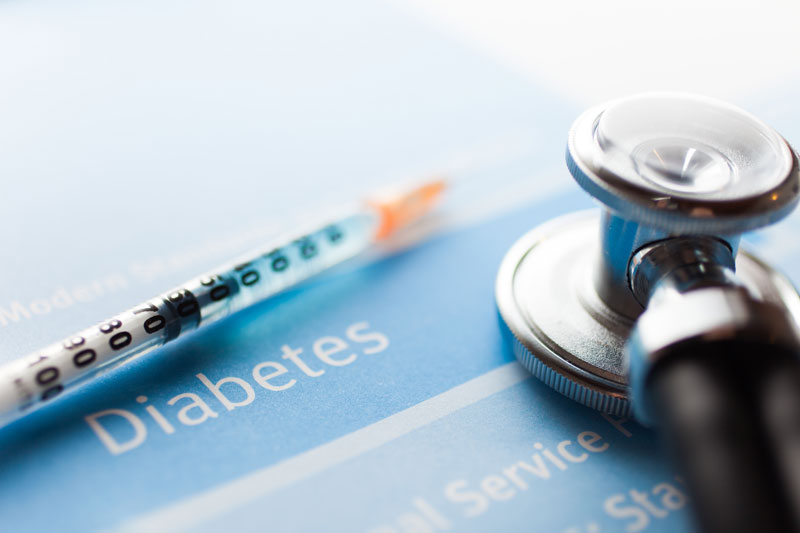

### <span style = 'color:blue'> Overview of Dataset<span/>

The dataset is part of a larger dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the US. In the US Pima Indian women aged 21 years and older living in Phoenix, the 5th largest city in the State of Arizona are the data used for diabetes research.

The target variable is specified as "outcome", where 1 indicates a positive diabetes test result and 0 indicates a negative result.

Pregnancies: Number of pregnancies\
Glucose: 2-hour plasma glucose concentration in oral glucose tolerance test\
Blood Pressure: Blood Pressure (small blood pressure) (mm Hg)\
SkinThickness: Skin Thickness\
Insulin: 2-hour serum insulin (mu U/ml)\
DiabetesPedigreeFunction: Function (2-hour plasma glucose concentration in oral glucose tolerance test)\
BMI: Body mass index\
Age: Age (years)\
Outcome: Have the disease (1) or not (0)



In [70]:
 # import required libraries 
import pandas as pd 
import numpy as np 
import sklearn 
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
import keras 
import keras.backend as K 
from keras.layers.core import Activation 
from keras.layers import Dense , LSTM, Dropout 
from keras.models import Sequential, load_model 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pylab import rcParams 
import math 
#import xgboost 
import time 
from tqdm import tqdm 
from prettytable import PrettyTable #for building table 
from sklearn.metrics import accuracy_score 
 
from sklearn.tree import DecisionTreeClassifier 
 
dtree = DecisionTreeClassifier() 
 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Preprocessing features
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler,StandardScaler #for standardization

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn import model_selection

#ignore warnings
import warnings
warnings.filterwarnings("ignore")
 
# Setting seed for reproducibility 
np.random.seed(1234)   
#PYTHONHASHSEED = 0 
#Using TensorFlow backend. 

In [38]:
df = pd.read_csv("C:\\Users\\imad0\\Downloads\\Project 2 MeriSKILL\\diabetes.csv")


In [39]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [40]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

####  <span style ='color:Blue'>Missing Value Analysis for df Dataset </span>

Missing Value Analysis refers to the process of identifying, understanding, and dealing with missing values in
a dataset. It involves examining the extent and patterns of missing data in order to make informed decisions
on how to handle them. The analysis aims to assess the impact of missing values on the dataset and
subsequent analysis, as well as to determine the appropriate strategies for addressing the missingness.

In [42]:
# creates a table to display the number of missing values and the percentage of 
#missing values for each column in the fd_001_train dataset. 
columns = df.columns 
myTable = PrettyTable(['Column','N° of Nan', '% of Nan']) 
 
for i in columns: 
        # Count the number of missing values for each column 
  myTable.add_row([i, df[i].isnull().sum(),   
                    
                   round((df[i].isnull().sum())*100/df.shape[0],2)]) 
 
print(myTable) 

+--------------------------+-----------+----------+
|          Column          | N° of Nan | % of Nan |
+--------------------------+-----------+----------+
|       Pregnancies        |     0     |   0.0    |
|         Glucose          |     0     |   0.0    |
|      BloodPressure       |     0     |   0.0    |
|      SkinThickness       |     0     |   0.0    |
|         Insulin          |     0     |   0.0    |
|           BMI            |     0     |   0.0    |
| DiabetesPedigreeFunction |     0     |   0.0    |
|           Age            |     0     |   0.0    |
|         Outcome          |     0     |   0.0    |
+--------------------------+-----------+----------+


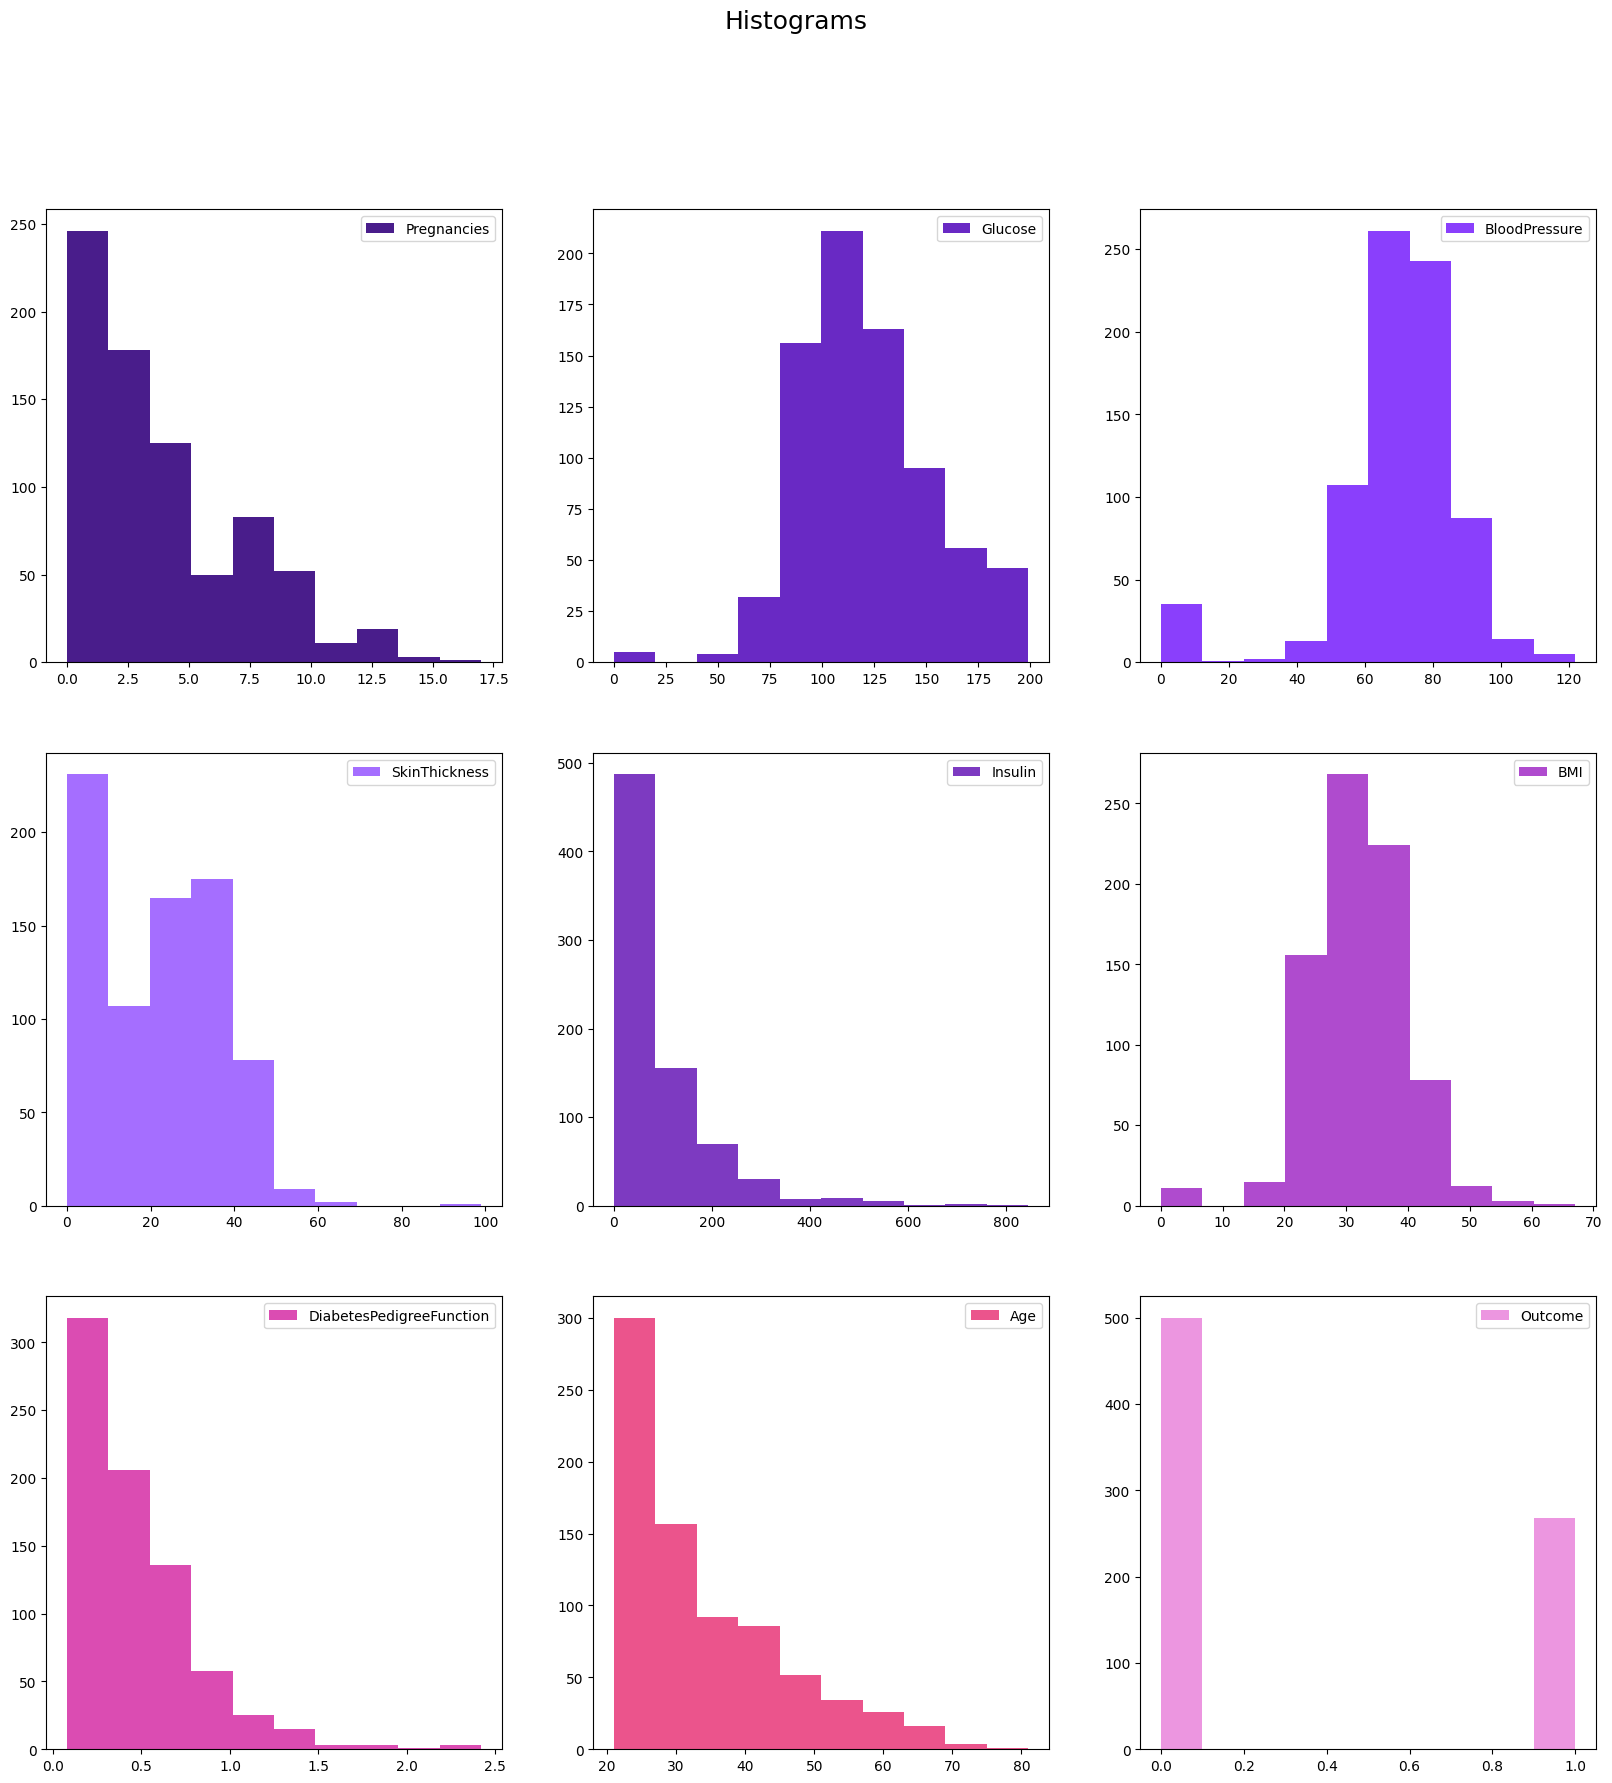

In [62]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3']

for index, column in enumerate(df.columns):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()

### <span style = 'color:blue'>regplots<span/>
    
create four regression plots <b>(regplots)</b> side by side. Each regplot shows the relationship between the `alcohol` variable (dependent variable) and a different independent variable 

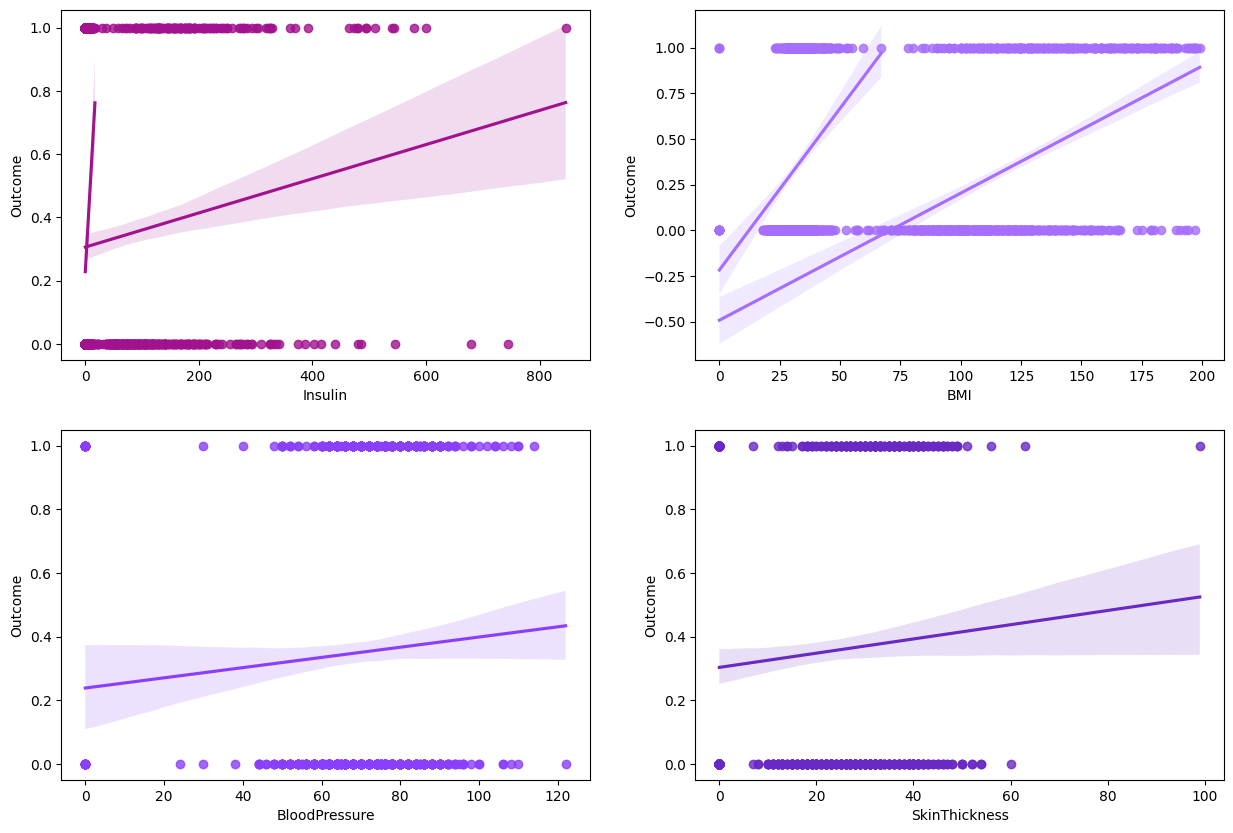

In [69]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "Pregnancies", y = "Outcome", data = df, color = "#A2128E");
sns.regplot(ax = axes[1], x = "Glucose", y = "Outcome", data = df, color = "#A56EFF");
sns.regplot(ax = axes[2], x = "BloodPressure", y = "Outcome", data = df, color = "#8A3FFC");
sns.regplot(ax = axes[3], x = "SkinThickness", y = "Outcome", data = df, color = "#6929C4");


### <span style ='color:Blue'> Identifying Correlations </span>
Identifying correlations between variables is an important part of EDA (Exploratory Data Analysis).
Correlations help to understand the relationship between two or more variables and can be used to identify
patterns and trends in the data.

<b>Positive Correlation</b>

<b>Negative Correlation</b>

We will display the mutual correlations of the signs on the "heat map", for this we will prepare an additional
sign "RUL", showing the number of cycles to failure in the training data
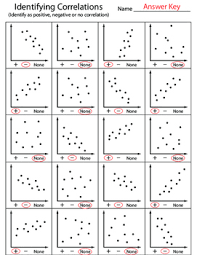

<Axes: >

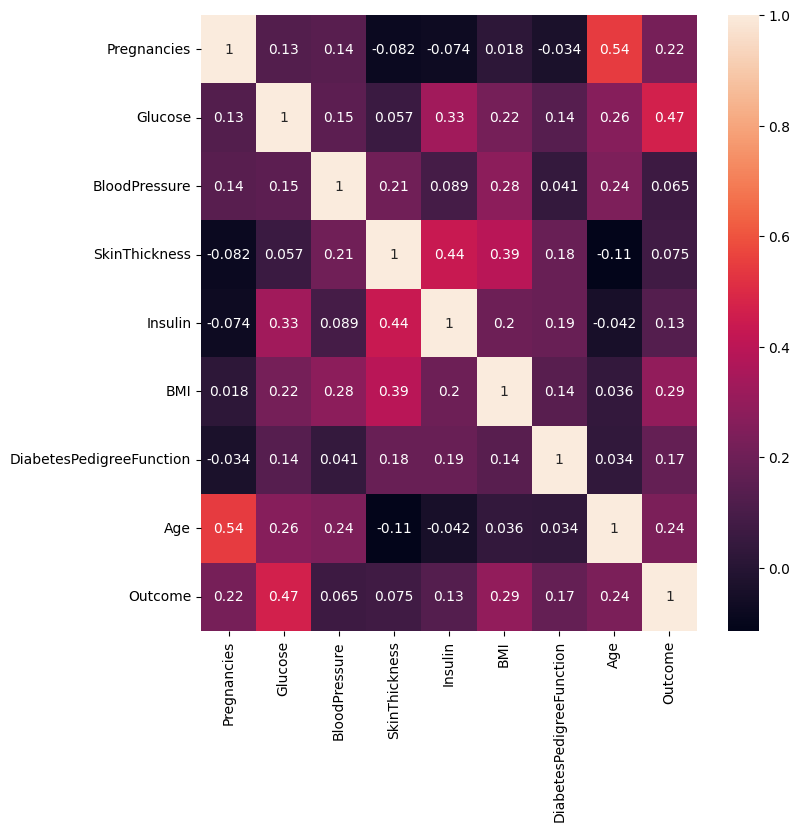

In [43]:
# creates a heatmap visualization of the correlation matrix of our dataset to understand the correlation between the columns 

plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot=True, cmap= 'rocket')

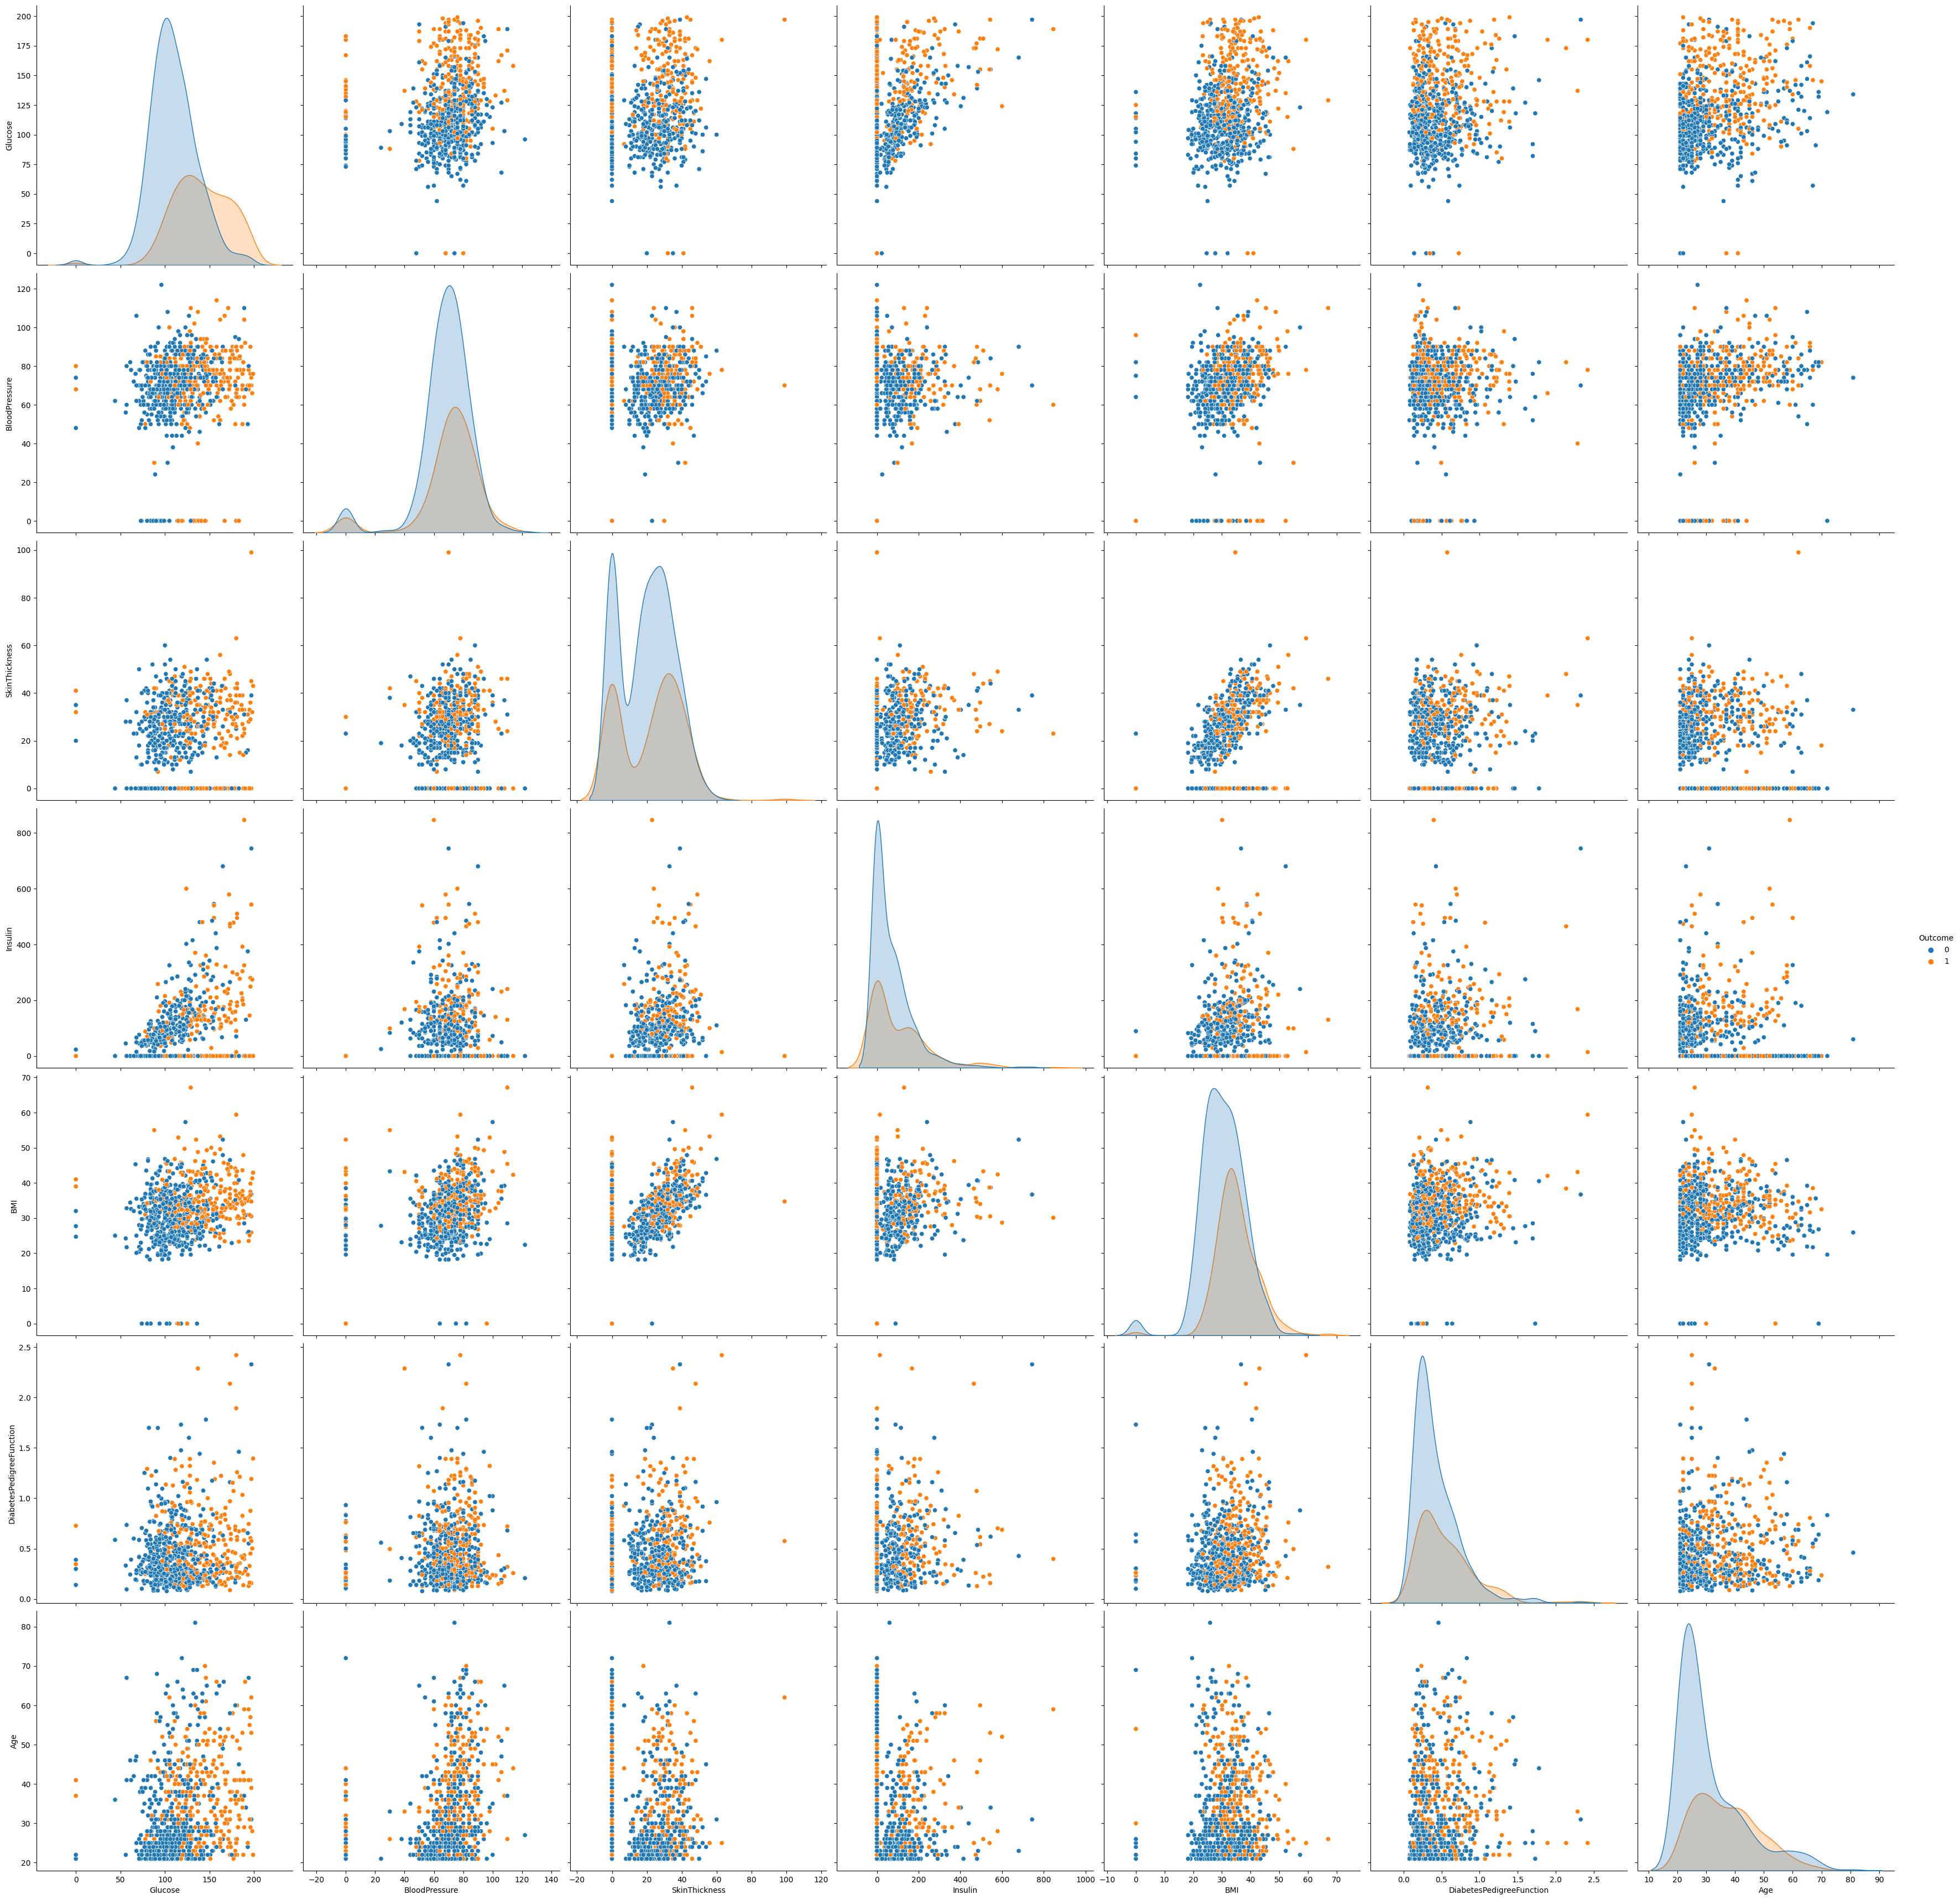

In [44]:
sns.pairplot(data=df, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', height=5)
plt.show(block=True)

In [45]:
features = ['Outcome','Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


data=df[features]

In [46]:
# Splitting data into features(X) and targets(y)
X = data.drop('Outcome', axis = 1).values
y = data['Outcome'].values.reshape(-1,1)

In [47]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets to use in models
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 42,stratify=y)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
import statsmodels.api as sm  # Import the statsmodels module


In [50]:


# Define the dependent variable
dependent_variable = 'Outcome'

# Define the independent variables
independent_variables = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate the mean and standard deviation for each independent variable
for variable in independent_variables:
    mean = df[variable].mean()
    std = df[variable].std()
    print(f"Mean of {variable}: {mean:.2f}")
    print(f"Standard deviation of {variable}: {std:.2f}")

# Perform multiple linear regression
x = df[independent_variables]
x = sm.add_constant(x)
y = df[dependent_variable]
model = sm.OLS(y, x).fit()

# Print the regression results
print(model.summary())

# Conduct ANOVA
#anova_table = sm.stats.anova_lm(model, typ=2)
#print(anova_table)

# Interpret the results
#sig_variables = list(anova_table[anova_table['PR(>F)'] < 0.05].index)
#print("Significant variables based on ANOVA:", sig_variables)


Mean of Pregnancies: 3.85
Standard deviation of Pregnancies: 3.37
Mean of Glucose: 120.89
Standard deviation of Glucose: 31.97
Mean of BloodPressure: 69.11
Standard deviation of BloodPressure: 19.36
Mean of SkinThickness: 20.54
Standard deviation of SkinThickness: 15.95
Mean of Insulin: 79.80
Standard deviation of Insulin: 115.24
Mean of BMI: 31.99
Standard deviation of BMI: 7.88
Mean of DiabetesPedigreeFunction: 0.47
Standard deviation of DiabetesPedigreeFunction: 0.33
Mean of Age: 33.24
Standard deviation of Age: 11.76
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           7.36e-55
Time:                        15:44:44   Log-Likelihood:                -381.91

### <span style = 'color:Blue'>DEFINING A MODEL TRAINING FUNCTION </span>


Now we will try different models and evaluate each of them.\
We will be using confusion matrix and ROC curve to evaluate them. Confusion matrix is formed from the four outcomes produced as a result of binary classification.\
It's a binary classifier predicts all data instances of a test dataset as either positive or negative.

This classification (or prediction) produces four outcomes – true positive, true negative, false positive and false negative.

True positive (TP): correct positive prediction\
False positive (FP): incorrect positive prediction\
True negative (TN): correct negative prediction\
False negative (FN): incorrect negative prediction

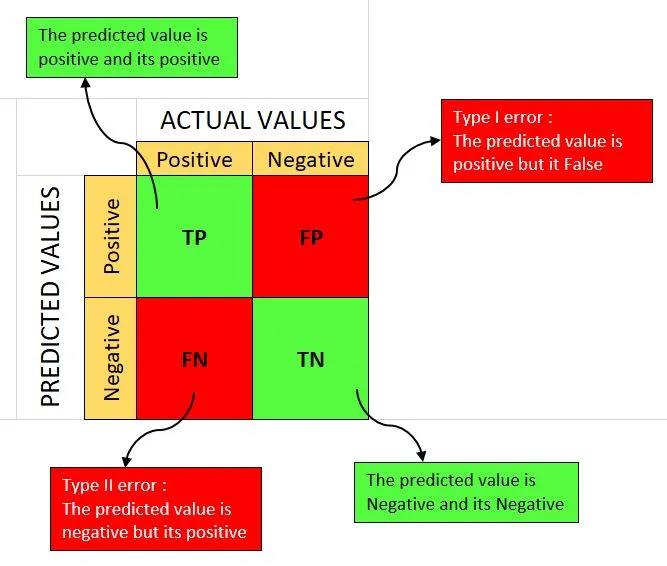

In [51]:
def train_model(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    y_prob=model.predict_proba(X_test_scaled)
    accuracy=np.round(round(accuracy_score(y_test,y_pred),3)*100,2)
    precision=np.round(round(precision_score(y_test,y_pred,average='weighted'),3)*100,2)
    recall=np.round(round(recall_score(y_test,y_pred,average='weighted'),3)*100,2)
    
    print(f'Accuracy of the model: {accuracy}%')
    print(f'Precision Score of the model: {precision}%')
    print(f'Recall Score of the model: {recall}%')
    print('-'*50)
    print(classification_report(y_test,y_pred))
    
    fig, ax = plt.subplots(1, 2, figsize = (15,  6))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'rocket')

### <span style = 'color:blue'>TESTING MODELS </span>


##  <span style = 'color:Blue'>Logistic Regression</span>



Is a statistical model used to analyze the relationship between a dependent variable and one or more independent variables.
 
The logistic regression model estimates the probability that the dependent variable takes a certain value based on the values of the independent variables. It does this by fitting a sigmoidal curve to the data, which maps any input value to a probability between 0 and 1. This probability can then be thresholded to make binary predictions.
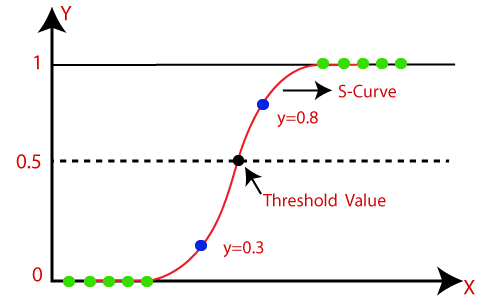

Accuracy of the model: 71.4%
Precision Score of the model: 70.6%
Recall Score of the model: 71.4%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



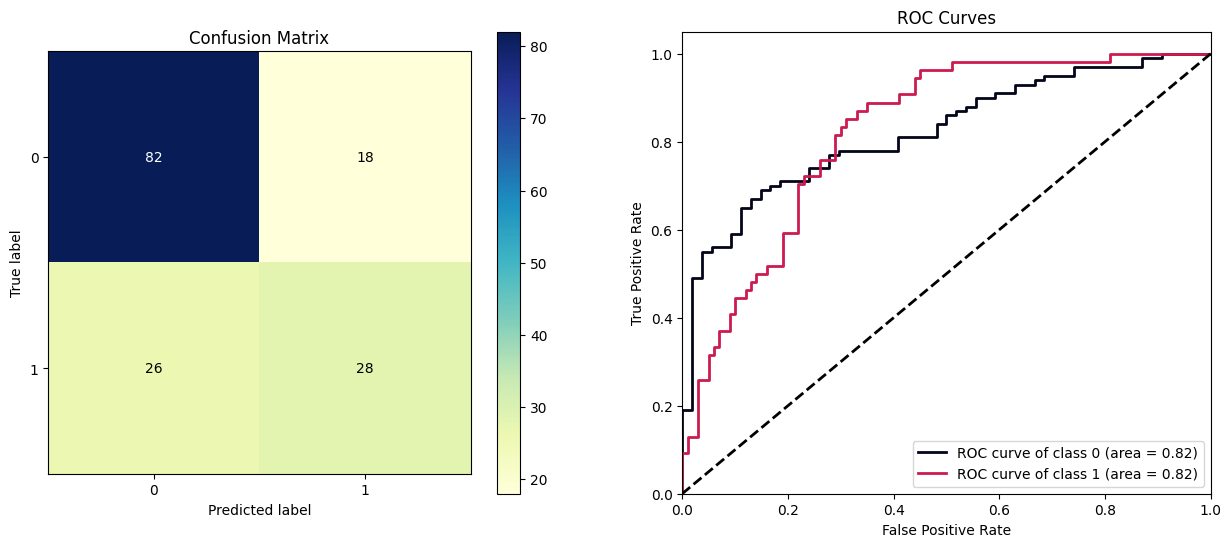

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,6), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=8)
train_model(logreg)

### <span style = 'color:blue'>K-Nearest Neighbours </span>



Accuracy of the model: 74.0%
Precision Score of the model: 73.3%
Recall Score of the model: 74.0%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.69      0.46      0.56        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



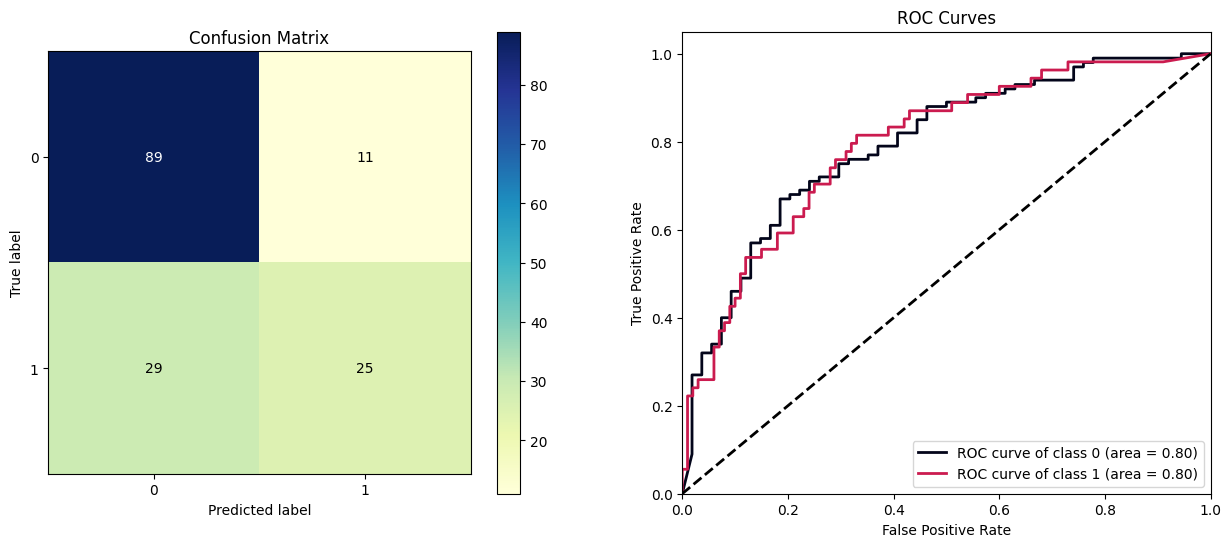

In [53]:
from sklearn.neighbors import KNeighborsClassifier

params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"]}

knn=KNeighborsClassifier()
knn_cv= GridSearchCV(knn,params, cv = 10)
train_model(knn_cv)

# <span style= 'color:blue'> Decision Tree </span>


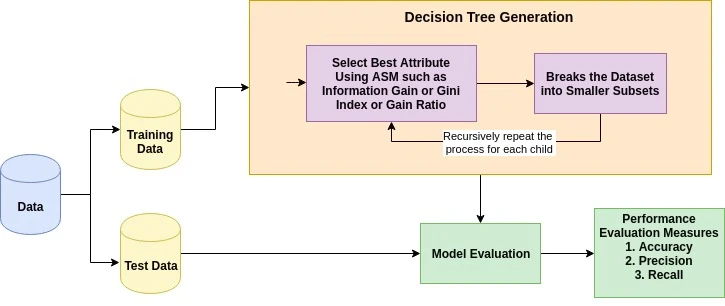

Accuracy of the model: 71.4%
Precision Score of the model: 70.6%
Recall Score of the model: 71.4%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



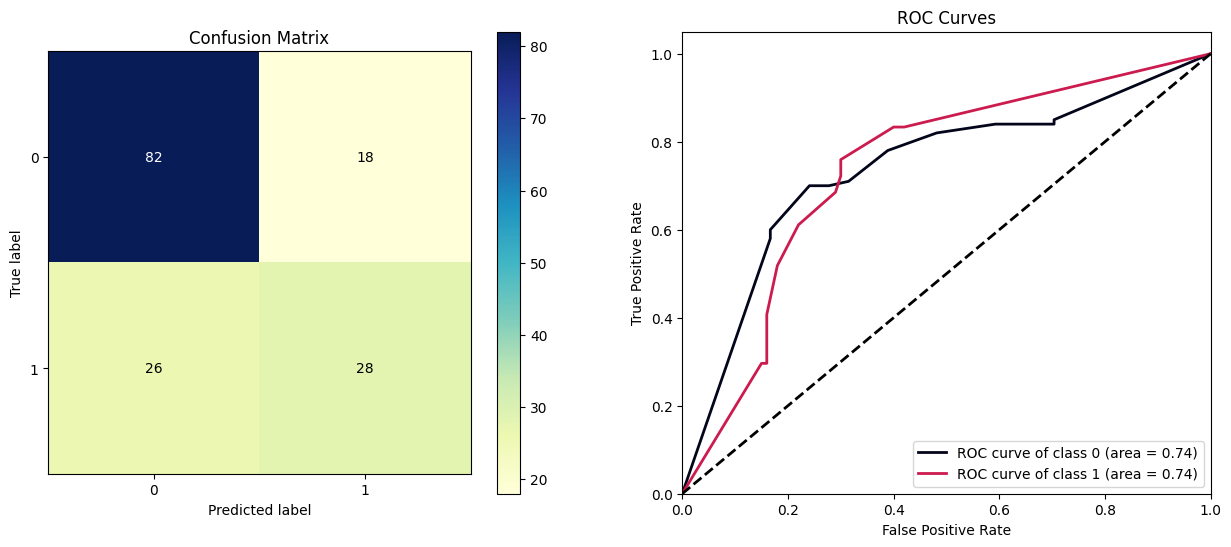

In [54]:
#this code performs hyperparameter tuning on a decision tree classifier using a grid search
#approach and trains the best performing model using an undefined train_model function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

param= {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

dt= DecisionTreeClassifier(random_state=42)
dt_cv = GridSearchCV(dt, param_grid=param, cv=10)
train_model(dt_cv)




# <span style= 'color:blue'> SVM </span>


Accuracy of the model: 71.4%
Precision Score of the model: 70.6%
Recall Score of the model: 71.4%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



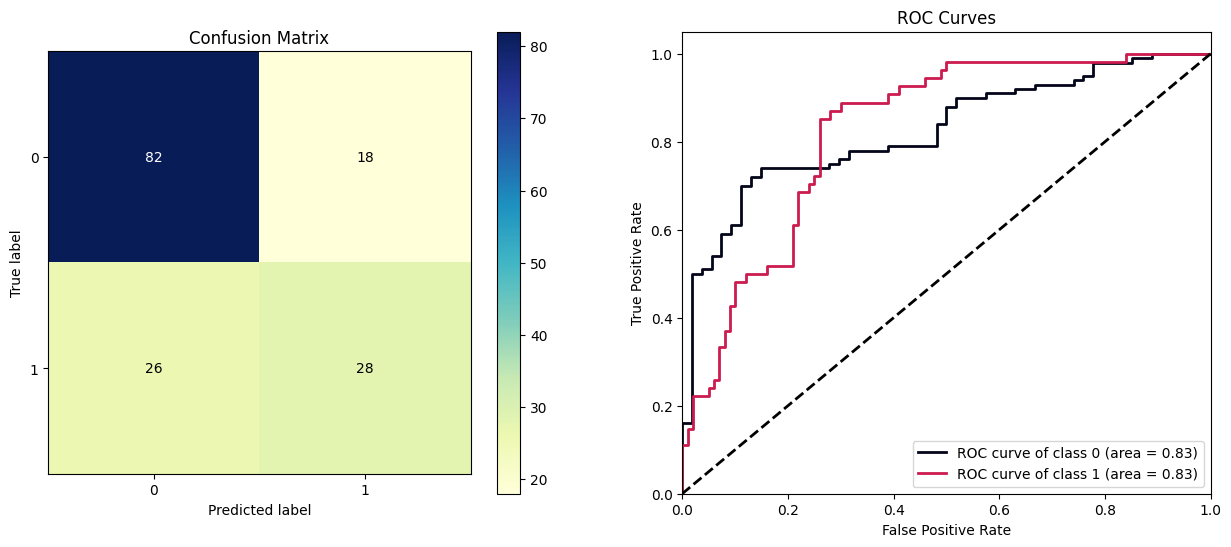

In [55]:
#implementation Svm by using sklearn and create dictionary of hyperparameters is defined,
#which includes different values of the regularization parameter and next SVm classifier will created 
from sklearn.svm import SVC

param= {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm=SVC(probability=True)  
svm_cv = GridSearchCV(svm, param, cv=10) #agrid search cross-validation is performed to find the best 
                                         #set of hyperparameters for the SVM model
train_model(svm_cv)

<span style ='color:blue'><b>Gaussian Naive Bayes </b></span>\
Is a probabilistic and simple classification algorithm based on the Bayes theorem. It is particularly useful for solving classification problems when the features are continuous and can be modeled by a Gaussian (normal) distribution.

Accuracy of the model: 70.1%
Precision Score of the model: 69.5%
Recall Score of the model: 70.1%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



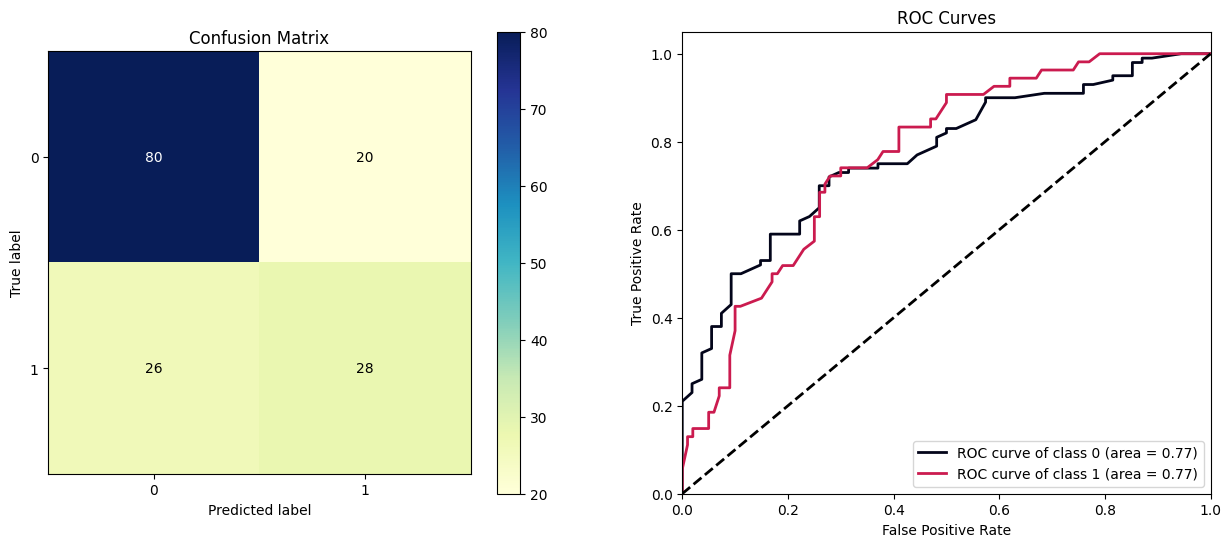

In [57]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
train_model(bnb)